### Задание 1

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
data = boston.data

In [9]:
feature_names = boston.feature_names

In [10]:
target = boston.target

In [11]:
X = pd.DataFrame(data, columns = feature_names)

In [12]:
y = pd.DataFrame(target, columns = ['price'])

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = False)

In [18]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [19]:
from sklearn.manifold import TSNE

In [24]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 100)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape, X_train_tsne.shape

((404, 13), (404, 2))

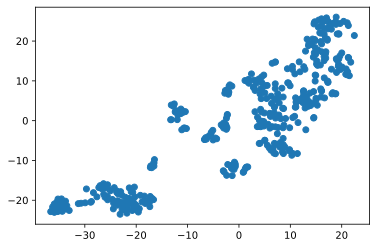

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [35]:
label_train = model.fit_predict(X_train_scaled)

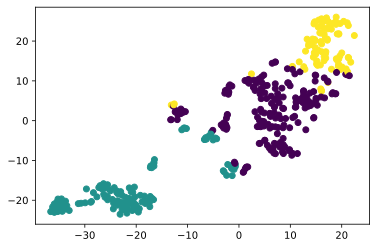

In [36]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = label_train)
plt.show()

##### 0 кластер price-CRIM

In [45]:
y_train[label_train == 0].mean()

price    24.958115
dtype: float64

In [46]:
X_train.loc[label_train == 0, 'CRIM'].mean()

0.42166020942408367

##### 1 кластер price-CRIM

In [47]:
y_train[label_train == 1].mean()

price    16.165354
dtype: float64

In [48]:
X_train.loc[label_train == 1, 'CRIM'].mean()

10.797028425196853

##### 2 кластер price-CRIM

In [49]:
y_train[label_train == 2].mean()

price    27.788372
dtype: float64

In [51]:
X_train.loc[label_train == 2, 'CRIM'].mean()

0.07356558139534886

### Задание 3

In [53]:
test_label = model.predict(X_test_scaled)

##### 0 кластер

In [57]:
y_test[test_label == 0].mean()

price    21.860784
dtype: float64

In [58]:
X_test.loc[test_label == 0, 'CRIM'].mean()

0.26607882352941176

##### 1 кластер

In [62]:
y_test[test_label == 1].mean()

price    16.437143
dtype: float64

In [63]:
X_test.loc[test_label == 1, 'CRIM'].mean()

10.165531142857143

##### 2 кластер

In [64]:
y_test[test_label == 2].mean()

price    31.35
dtype: float64

In [65]:
X_test.loc[test_label == 2, 'CRIM'].mean()

0.062060000000000004